In [2]:
import numpy as np
import ssm as ssm
import matplotlib.pyplot as plt
import scipy.io as sio

#### load test params

In [3]:
params = sio.loadmat('data/testVLEM_MstepForC.mat')

#### plot vlem results

Text(0, 0.5, 'log evidence')

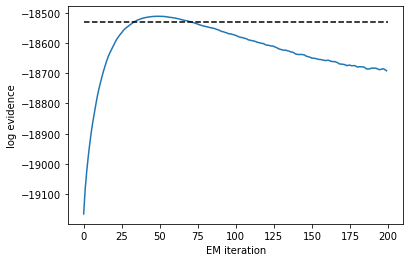

In [11]:
plt.plot(params['logEvTrace'])
plt.hlines(params['logevtrue'],xmin=0, xmax=200,colors='k',linestyles='--')
plt.xlabel('EM iteration')
plt.ylabel('log evidence')

#### run ssm with vlem params

In [97]:
# specify dimensionality of lds
p = params['A'].shape[0]
q = params['C0'].shape[0]

# load data
data = params['yy'].T.astype('int64')

# instantiate lds
lds = ssm.LDS(q, p, emissions="bernoulli")

# initialize lds parameters
lds.dynamics.As[0] = params['A']
lds.dynamics.Sigmas[0] = params['Q']
lds.emissions.Cs[0] = params['C0']

# fit lds
elbos, posterior = lds.fit(data, method="laplace_em", initialize=False, num_iters=200)

  0%|          | 0/200 [00:00<?, ?it/s]

#### plot ssm results

Text(0, 0.5, 'log evidence')

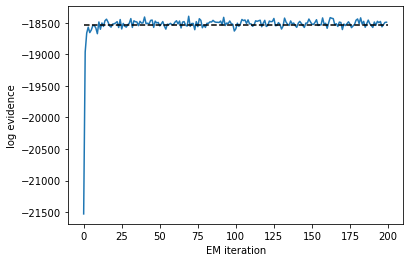

In [100]:
plt.plot(elbos[1:])
plt.hlines(params['logevtrue'],xmin=0, xmax=200,colors='k',linestyles='--')
plt.xlabel('EM iteration')
plt.ylabel('log evidence')

#### compare true and inferred c

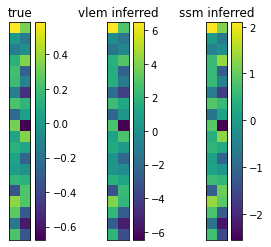

In [98]:
plt.figure(figsize=(5,4))
plt.subplot(1,3,1)
plt.imshow(params['C0'])
plt.colorbar()
plt.title('true')
plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,left=False,labelleft=False)

plt.subplot(1,3,2)
plt.imshow(params['C_hat'])
plt.colorbar()
plt.title('vlem inferred')
plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,left=False,labelleft=False)

plt.subplot(1,3,3)
plt.imshow(lds.emissions.Cs[0])
plt.colorbar()
plt.title('ssm inferred')
plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,left=False,labelleft=False)



In [99]:
from scipy.linalg import subspace_angles

print(subspace_angles(params['C_hat'],params['C0'])[0])
print(subspace_angles(lds.emissions.Cs[0],params['C0'])[0])

0.07740910449013974
0.0628811805113467
